> Created on Sat Dec  9 10:27:03 2017  @author: Richie Bao-caDesign设计(cadesign.cn)
> __+updated on Thu Aug 27 09:23:03 2020   

## 1. 卷积，SIR传播模型，成本栅格与物种散布，SIR空间传播模型
从生物体角度研究的生态学家发现，区别生物体生活在哪里与生物体在做什么是很有用的。生物体的栖息地（habitat）是指它们生活的地方。栖息地的特征要用清晰的物理特征来进行描述，这常常是植物或动物主要的生活型。例如森林栖息地、荒漠栖息地和珊瑚栖息地等。因为栖息地概念强调了生物所暴露的条件，为生物环境保护及栖息条件营造提供参考。生物的生态位（niche）代表生物能够耐受的条件范围，它们的生活方式，即在生态学系统中的作用。每个物种都具有一个独特的生态位。生物的独特形态和生理特征决定它们的耐受条件，例如如何取食，逃避天敌等。没有一种生物具备在地球上任何条件下存活的能力。在空间变化上，不同地方的环境条件是有区别的，气候、地形和土壤类型的变化导致大尺度的异质性（从数米到几百公里）。小尺度上的异质性一般是由于植物结构、动物活动和土壤内含物引起的。特定的空间尺度变化可能对于一种动物重要，而对于另一种不重要。当一个个体穿行于空间不断变化着的环境时，个体移动越快，空间变化的尺度越小，就更快的遇到新的环境条件。地形和地质能够改变其它方面相同气候区域内的局部环境。例如多山区域，坡度倾斜和阳光方向影响着土壤的温度和湿度，这同样适用于城市区域，建筑的高度以及分布形成了城市的多样局地微气候环境。

虽然植物对于生活在哪里具有相对小的选择性，但是仍然向着高浓度的土壤矿物质等适合生长的环境中趋向。而动物则能够自主的在环境中四处移动，并选择其栖息地。即使在栖息地内，温度、湿度、盐度和其它因子也有明显不同，能够进一步区分位微栖息地（microhabitats）或微环境（microenvironments）。例如荒漠中灌木丛下的树荫比暴露在直射阳光下的地区更凉快，潮湿。由于动物生活在各式各样的和变化的环境中，它们经常需要做出如何决策的行动。这些决策中很多涉及到食物，到哪里寻找食物，在某些板块栖息地中进食多长时间，吃哪一种食物类型等。动物期望获取选择获利最大的行为，即以最适摄食（optimal foraging）理论试图阐释，例如中心摄食，鸟类饲喂巢穴中的子女时，以巢穴位中心，在远处自由搜索食物；风险-敏感摄食，取决于个体能够搜索食物的速率，及这个地区的相对安全性；猎物选择，每种类型的食物基于其营养和能量，以及处理难度和毒素的潜在危险，形成固有的价值；以及混合食物，以满足所必需的营养。

涉及地理空间因素，除了满足适宜的栖息地（生态位）、以及生物的行动决策，还有个体移动可以保持种群的空间连接。种群生物学家把种群内的个体移动称为散布（dispersal），指的是个体在各亚种群之间的移动。在规划领域为了保护某一物种，常为使用的方法是生物栖息地的适宜性评价；或综合考虑生物、水安全、历史价值、地价、风景价值、游憩价值、居住价值，计算成本栅格来规划城市布局，道路选线等内容。上述的法方法广泛应用于规划、风景园林、生态规划等领域，而[SIR（Susceptible Infected Recovered Model）](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model)模型是一种传播模型，典型的应用于传染病传播路径模拟中，也包括估计如何传播，感染总数，流行病持续时间，和相关参数等。

因为SIR模型所涉及易感染着的空间阻力分布与规划中适宜性评价的成本栅格如出一辙，而感染源，以及病毒的蔓延类似于生态学中物种的迁移，同时SIR模型也是最为简单的分区模型（compartmental models）之一，许多模型都是这种基本形式的衍生物。因此为了进一步拓展成本栅格（cost raster）已有研究成果，尝试将其引入规划领域。

在SIR模型实现过程中，使用到卷积的方法，而卷积是深度学习中卷积神经网络的基础，亦是图像处理或特征提取的基础，这两方面内容都是城市空间数据分析方法中重要的内容，因此首先解释卷积及其代码的实现。

> 参考文献
> 1. Robert E.Ricklefs著. 孙儒泳等译.生态学/The economy of nature[M].高度教育出版社.北京.2004.7 第5版.  ------非常值得推荐的读物(教材)，图文并茂

### 1.1 卷积
在泛函分析中，卷积（又称叠积或褶积，convolution），是透过两个函数$f$和$g$生成第3个函数的一种数学算子。如果把一个函数看作区间的指示函数（系统响应函数,$g$），另一个为待处理的输入函数（输入信号函数，$f$），卷积可以看作“滑动平均”的拓展。设$f(x)$，$g(x)$是$\mathbb{R}$上两个可积函数，作积分：$\int_ { - \infty} ^ \infty  f( \tau )g(x- \tau )d \tau $，可以证明，关于几乎所有的$x \in (- \infty , \infty )$，上述积分是存在的。这样，随着$x$的不同取值，这个积分就定义了一个新的函数$h(x)$，称为$f$与$g$的卷积，记为$h(x)=(f*g)(x)$。对于上述公式的理解，需要具备积分方面的知识（具体参考积分部分的阐述），并且需要注意，为方便理解，将指示函数和输入函数看作一个时间区段上的曲线函数，固定$f( \tau )$在$T$时间点上(横坐标表示为时间点)，翻转$g(\tau)$为$g(-\tau)$，并平移对齐$f(\tau)$的时间点，结果为$g(T-\tau)$。

对于卷积计算的解释，可以通过下述图表理解。其中需要注意的一个关键点是T时刻时，例如T=20时，20时刻是最新进入的信号，之前的时刻越小，信号进入的时间越久，例如0时刻时的信号已经历经了20个时间点，1时刻，经历了19个时间点。而指示函数则在0时刻时作用于输入函数的新进入信号即20时刻时的值，指示函数1时刻作用于输入函数19时刻的值，以此类推，正好是一个反向的过程，也因此出现了对响应函数进行翻转、移动等操作。实际上如果固定指示函数，而随时间逐步的移动输入函数的值进入，则不会有上述操作，也更容易理解。

> 泛函分析（Functional Analysis）研究主要对象是函数构成的函数空间。使用泛函一词作为表述，代表作用于函数的函数，意味着，一个函数的参数是函数。

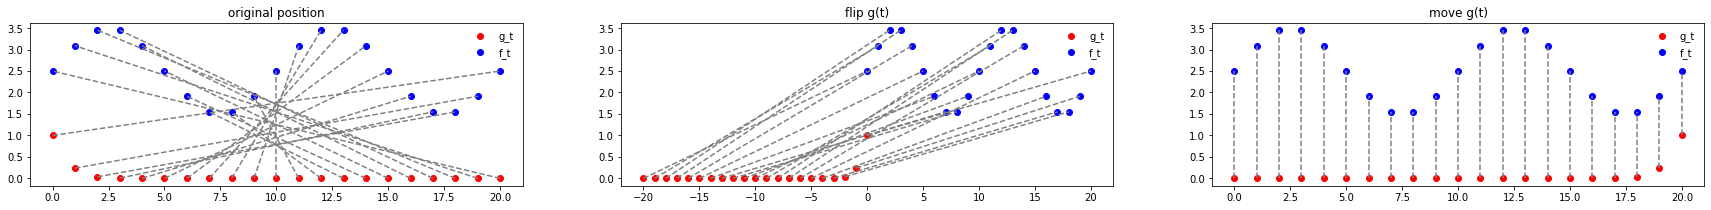

In [117]:
import numpy as np
import sympy
from sympy import pprint,Piecewise
t,t_=sympy.symbols('t t_')

'''定义指示函数'''
e=sympy.E
g_t=-1*((e**t-e**(-t))/(e**t+e**(-t)))+1 #参考Hyperbolic tangent function 即双曲正切函数  y=tanh x
g_t_=sympy.lambdify(t,g_t,"numpy")

'''定义输入函数'''
f_t=1*sympy.sin(4*np.pi*0.05*t_)+2.5 #+np.random.randn(1)
f_t_=sympy.lambdify(t_,f_t,"numpy")

'''定义时间段'''
T=20 #时间点
t_bucket=np.linspace(0, T, T+1, endpoint=True)

'''绘制图形'''
#函数原始位置
fig, axs=plt.subplots(1,3,figsize=(30,3))
axs[0].plot(t_bucket,g_t_(t_bucket),'o',c='r',label='g_t')
axs[0].plot(t_bucket,f_t_(t_bucket),'o',c='b',label='f_t')
axs[0].plot([t_bucket,np.flip(t_bucket)],[g_t_(t_bucket),np.flip(f_t_(t_bucket))],'--',c='gray')
axs[0].set_title('original position')

#翻转响应函数
axs[1].plot(-t_bucket,g_t_(t_bucket),'o',c='r',label='g_t')
axs[1].plot(t_bucket,f_t_(t_bucket),'o',c='b',label='f_t')
axs[1].plot([np.flip(-t_bucket),t_bucket],[np.flip(g_t_(t_bucket)),f_t_(t_bucket)],'--',c='gray')
axs[1].set_title('flip g(t)')

#移动响应函数
axs[2].plot(-t_bucket+T,g_t_(t_bucket),'o',c='r',label='g_t')
axs[2].plot(t_bucket,f_t_(t_bucket),'o',c='b',label='f_t')
axs[2].plot([np.flip(-t_bucket+T),t_bucket],[np.flip(g_t_(t_bucket)),f_t_(t_bucket)],'--',c='gray')
axs[2].set_title('move g(t)')

axs[0].legend(loc='upper right', frameon=False)
axs[1].legend(loc='upper right', frameon=False)
axs[2].legend(loc='upper right', frameon=False)
plt.show()

#### 1.1.1 一维卷积与曲线分割
对于一维卷积给出一个简单的例子：指示函数的一组结果[1,1,1]，输入函数的一组结果[0,0,1,1,1,1,1,0,0]，为了方便计算，固定输入函数（通常固定指示函数，而滑动输入函数），滑动指示函数，对应位置求积，最后求和，所有时刻的结果即为卷积结果。通过使用`np.convolve(mode='full')`计算结果同为`array([0, 0, 1, 2, 3, 3, 3, 2, 1, 0, 0])`。

|moment/step| step-0  |step-1   | step-2  | step-3  |step-4|step-5|step-6|step-7|step-8|step-sum|
|---|---|---|---|---|---|---|---|---|---|---|
|t-0| 0 | 0  | 1  | 1  | 1  |1|1|0|0|*0*|
|t-1| __1__*0  | -*0  | -*1  | -*1  | -*1  |-*1|-*1|-*0|-*0|*0*|
|t-2| __1__*0  | __1__*0  | -*1  | -*1  | -*1  |-*1|-*1|-*0|-*0|*0*|
|t-3| __1__*0  | __1__*0  | __1__*1  | -*1  | -*1  |-*1|-*1|-*0|-*0|*1*|
|t-4| -*0  | __1__*0  | __1__*1  | __1__*1   | -*1  |-*1|-*1|-*0|-*0|*2*|
|t-5| -*0  | -*0  |  __1__*1 | __1__*1  | __1__*1  |-*1|-*1|-*0|-*0|*3*|
|t-6| -*0  | -*0  | -*1  | __1__*1  | __1__*1  |__1__*1|-*1|-*0|-*0|*3*|
|t-7|  -*0 | -*0  | -*1  | -*1  | __1__*1 |__1__*1|__1__*1|-*0|-*0|*3*|
|t-8|  -*0  | -*0 |-*1 | -*1 |-*1 |__1__*1|__1__*1|__1__*0|-*0|*2*|
|t-9|  -*0  | -*0 |-*1 | -*1 |-*1 |-*1|__1__*1|__1__*0|__1__*0|*1*|
|t-10|  -*0  | -*0 |-*1 | -*1 |-*1 |-*1|-*1|__1__*0|__1__*0|*0*|
|t-11|  -*0  | -*0 |-*1 | -*1 |-*1 |-*1|-*1|-*0|__1__*0|*0*|
|t-12|  -*0  | -*0 |-*1 | -*1 |-*1 |-*1|-*1|-*0|-*0|*0*|

基于上述的例子，更容易从信号分析的角度来理解卷积，因此对应指示函数（$g(x)$）名称为系统系统响应函数（或简称为响应函数），对应输入函数（$f(x)$）为输入信号函数（或简称为信号函数），定义一个可以给定响应函数和信号函数，输出动态卷积的类。在类的定义过程中，使用matplotlib库中给出的animation方法定义动态图表，并通过继承`animation.TimedAnimation`父类，实现多个子图的动画。类的配置实现了三个图表功能，第一个是定义的响应函数，响应函数通常为固定的时间段一段变化的曲线，用于作用于信号函数，增强、或特定变化信号函数的值；第2个子图是动态的信号函数，信号函数随时间而变化，可以理解为信号在不同时间上的'位置'变化，例如途中的-4时刻，信号位于子图的左侧，即开始进入，而在4时刻，信号位于子图的右侧，即开始出去。或理解为信号随时间的流逝；第3个子图则为计算的卷积，响应函数是固定的，整个作用域，即有值的区间均作用于指定时间区段信号函数的每一时刻，因此卷积的位置变化随信号函数而变化，但是并不完全对齐。

类的输入参数包括'G_T_fun'响应函数；'F_T_fun'信号函数；以及't'时间的开始（'s'）与结束（'t'）点。时间段的步幅'step'用于配置帧（frame），步幅越小，时间点更新越小，时间精度越高。'linespace'为时间段的划分，用于图表的x轴坐标，以及信号函数和响应函数的输入参数;mode参数是对应`np.convolve(mode='')`，其模式包括'same'，'full'和'valid'，该类的定义中未处理'valid'模式。

所定义的类中，'F_T_fun'输入参数，即信号函数的定义比较特殊，包括一个函数的输入参数'timing'（`f_t_sym=self.f_t_(i)`），用于保持信号随时间变化值的移动，应用到sympy库提供的Piecewise多段函数的方法；以及函数内部所定义sympy公式的输入参数（`f_t_val=f_t_sym(self.t)`）。

In [2]:
%matplotlib inline
from IPython.display import HTML
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.pyplot as plt

import sympy
from sympy import pprint,Piecewise

class dim1_convolution_SubplotAnimation(animation.TimedAnimation):
    '''
    function - 一维卷积动画解析，可以自定义系统函数和信号函数   
    
    Paras:
    G_T_fun - 系统响应函数
    F_T_fun - 输入信号函数
    t={"s":-10,"e":10,'step':1,'linespace':1000} -  时间开始点、结束点、帧的步幅、时间段细分
    mode='same' - numpy库提供的convolve卷积方法的卷积模式
    '''    
    def __init__(self,G_T_fun,F_T_fun,t={"s":-10,"e":10,'step':1,'linespace':1000},mode='same'):  
        self.mode=mode
        self.start=t['s']
        self.end=t['e']
        self.step=t['step']
        self.linespace=t['linespace']
        self.t=np.linspace(self.start, self.end, self.linespace, endpoint=True)
        
        fig, axs=plt.subplots(1,3,figsize=(24,3))
        #定义g(t)，系统响应函数
        self.g_t_=G_T_fun        
        g_t_val=self.g_t_(self.t)
        self.g_t_graph,=axs[0].plot(self.t,g_t_val,'--',label='g(t)',color='r')        
        
        #定义f(t)，输入信号函数
        self.f_t_=F_T_fun
        self.f_t_graph,=axs[1].plot([],[],'-',label='f(t)',color='b')
        
        #卷积（动态-随时间变化）
        self.convolution_graph,=axs[2].plot([],[],'-',label='1D convolution',color='g')

        axs[0].set_title('g_t')
        axs[0].legend(loc='lower left', frameon=False)
        axs[0].set_xlim(self.start,self.end)
        axs[0].set_ylim(-1.2,1.2)                
        
        axs[1].set_title('f_t')
        axs[1].legend(loc='lower left', frameon=False)
        axs[1].set_xlim(self.start,self.end)
        axs[1].set_ylim(-1.2,1.2)
        
        axs[2].set_title('1D convolution')
        axs[2].legend(loc='lower left', frameon=False)
        axs[2].set_xlim(self.start,self.end)
        axs[2].set_ylim(-1.2*100,1.2*100)

        plt.tight_layout()
        animation.TimedAnimation.__init__(self, fig, interval=500, blit=True) #interval配置更新速度        
           
    #更新图形
    def _draw_frame(self,framedata):    
        import math
        i=framedata
      
        f_t_sym=self.f_t_(i) #1-先输入外部定义的F_T_fun函数的输入参数
        f_t_val=f_t_sym(self.t) #2-再定义F_T_fun函数内部由sympy定义的公式的输入参数
        
        self.f_t_graph.set_data(self.t,f_t_val)    
        
        g_t_val=self.g_t_(self.t)
        g_t_val=g_t_val[~np.isnan(g_t_val)] #移除空值，仅保留用于卷积部分的数据       
        
        if self.mode=='same':           
            conv=np.convolve(g_t_val,f_t_val,'same') #self.g_t_(t)
            self.convolution_graph.set_data(self.t,conv)            
            
        elif self.mode=='full':
            conv_=np.convolve(g_t_val,f_t_val,'full') #self.g_t_(t)
            t_diff=math.ceil((len(conv_)-len(self.t))/2)
            conv=conv_[t_diff:-t_diff+1]
            self.convolution_graph.set_data(self.t,conv)
            
        else:
            print("please define the mode value--'full' or 'same' ")
        
    #配置帧frames    
    def new_frame_seq(self):
        return iter(np.arange(self.start,self.end,self.step))
    
    #初始化图形
    def _init_draw(self):     
        graphs=[self.f_t_graph,self.convolution_graph,]
        for G in graphs:
            G.set_data([],[])        

* 一个简单的响应函数与信号函数的定义实现。

响应函数为时间长度为1，值为1的函数。信号函数为给定时间点（'timing'），及该时间点后长度为1时间段内值为1，其它时间值为0的函数(实际上是保持每一时间点持续的产生一段信号)。将该响应函数作用于信号函数，结果为值先增加数倍后落回的三角形坡度。

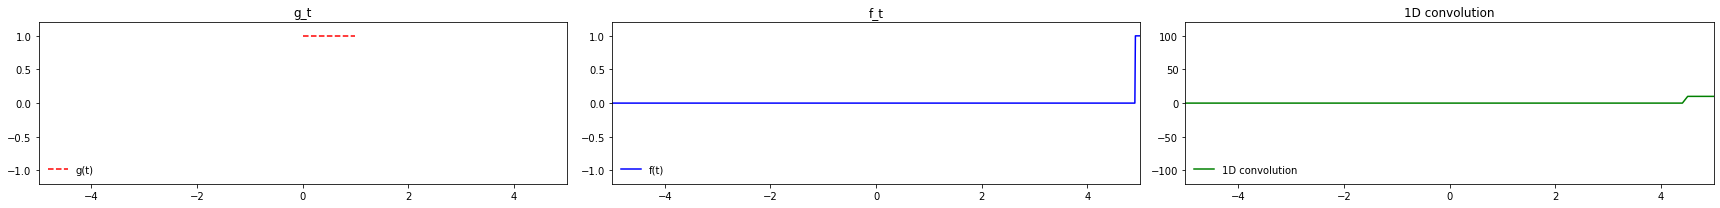

In [3]:
def G_T_type_1():
    import sympy
    from sympy import pprint,Piecewise
    '''
    function - 定义系统响应函数.类型-1
    
    return:
    g_t_ - sympy定义的函数
    '''
    t,t_=sympy.symbols('t t_')
    g_t=1
    g_t_piecewise=Piecewise((g_t,(t>=0)&(t<=1))) #定义位分段函数，系统响应函数在区间[0,1]之间作用。
    g_t_=sympy.lambdify(t,g_t_piecewise,"numpy")
    #print("g_t=")
    #pprint(g_t)
    return g_t_

def F_T_type_1(timing):
    import sympy
    from sympy import pprint,Piecewise
    '''
    function - 定义输入信号函数，类型-1

    return:
    函数计算公式
    '''
    t,t_=sympy.symbols('t t_')
    f_t=1
    f_t_piecewise=Piecewise((f_t,(t>timing)&(t<timing+1)),(0,True)) #定义位分段函数，系统响应函数在区间[0,1]之间作用
    f_t_=sympy.lambdify(t,f_t_piecewise,"numpy")
    #print("f_t=")
    #pprint(f_t)
    return f_t_   

G_T_fun=G_T_type_1() #系统响应函数
F_T_fun=F_T_type_1 #输入信号函数
t={"s":-5,"e":5,'step':0.1,'linespace':1000,'frame':1} #时间参数配置
ani=dim1_convolution_SubplotAnimation(G_T_fun,F_T_fun,t=t,mode='same') #mode:'full','same'
HTML(ani.to_html5_video())  #conda install -c conda-forge ffmpeg  

In [4]:
#保存动画为.gif文件
from matplotlib.animation import FuncAnimation, PillowWriter 
writer=PillowWriter(fps=25) 
ani.save(r"./imgs/convolution_a.gif", writer=writer)

* 一个稍微复杂一些的响应函数与信号函数

这里借助tanh双曲正切函数的一段作为响应函数，值快速下降到趋于平缓逐渐降低的一个过程。而信号函数是参考给定时间点上，两段时间区间上值为1，其它时候值为0的函数。卷积后的结果在上升和下降段均产生一定的弧度曲张(凸形爬升，凹形回落)。

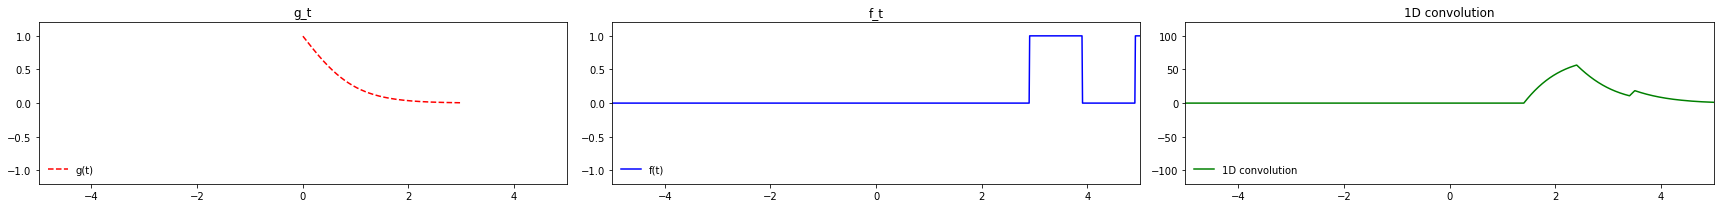

In [5]:
def G_T_type_2():
    import sympy
    from sympy import pprint,Piecewise
    '''
    function - 定义系统响应函数.类型-2
    
    return:
    g_t_ - sympy定义的函数
    '''
    t,t_=sympy.symbols('t t_')
    e=sympy.E
    g_t=-1*((e**t-e**(-t))/(e**t+e**(-t)))+1 #参考Hyperbolic tangent function 即双曲正切函数  y=tanh x
    g_t_piecewise=Piecewise((g_t,(t>=0)&(t<3))) #定义位分段函数，系统响应函数在区间[0,3]之间作用
    g_t_=sympy.lambdify(t,g_t_piecewise,"numpy")
    
    #print("g_t=")
    #pprint(g_t)
    return g_t_

def F_T_type_2(timing):
    import sympy
    from sympy import pprint,Piecewise
    '''
    function - 定义输入信号函数，类型-2

    return:
    函数计算公式
    '''
    t,t_=sympy.symbols('t t_')
    f_t=1
    f_t_piecewise=Piecewise((f_t,(t>timing)&(t<timing+1)) ,(f_t,(t>timing-2)&(t<timing-1)) ,(0,True)) #定义位分段函数，系统响应函数在区间[0,1]之间作用
    f_t_=sympy.lambdify(t,f_t_piecewise,"numpy")
    #print("f_t=")
    #pprint(f_t)
    return f_t_   

G_T_fun=G_T_type_2() 
F_T_fun=F_T_type_2
t={"s":-5,"e":5,'step':0.1,'linespace':1000,'frame':1} #时间参数配置
ani=dim1_convolution_SubplotAnimation(G_T_fun,F_T_fun,t=t,mode='same') #mode:'full','same'
HTML(ani.to_html5_video())  #conda install -c conda-forge ffmpeg   

In [6]:
#保存动画为.gif文件
from matplotlib.animation import FuncAnimation, PillowWriter 
writer=PillowWriter(fps=25) 
ani.save(r"./imgs/convolution_b.gif", writer=writer)

* 基于1维卷积曲线跳变点识别切分

给定指示函数，可以对输入函数施加影响，即如果给定一个卷积核（convolution kernel，指示函数的计算值），作用于一维数组（输入函数的计算值），可以变化输入数据达到预期的结果，例如可以使用一维卷积的方法由跳变点分割曲线。这里使用的卷积核为$[-1,2,-1]$。在该实验分析中，数据使用了无人驾驶城市项目（IIT）的PHMI模拟车载激光雷达导航评估值，当$PHMI> 10^{-5} $时，说明从激光雷达扫描点云中提取的特征点可以很好的导航无人车，否则存在风险。对于实验的输入数据也可以自行随机生成一维数组（一组值列表）。因为PHMI的计算最初由MatLab完成，生成了对应图表保存为.fig的MatLab图表文件，可以用scipy.io库提供的工具加载该数据，提取对应的值。

> 注意，MatLab的图表文件.fig，可能因为操作系统不同，MatLab版本不同，提取数据的代码可能对应做出调整。下述提取.fig数据的方法不能提取所有类型的.fig文件，在无人城市项目章节中也会定义有其它提取的方法函数。

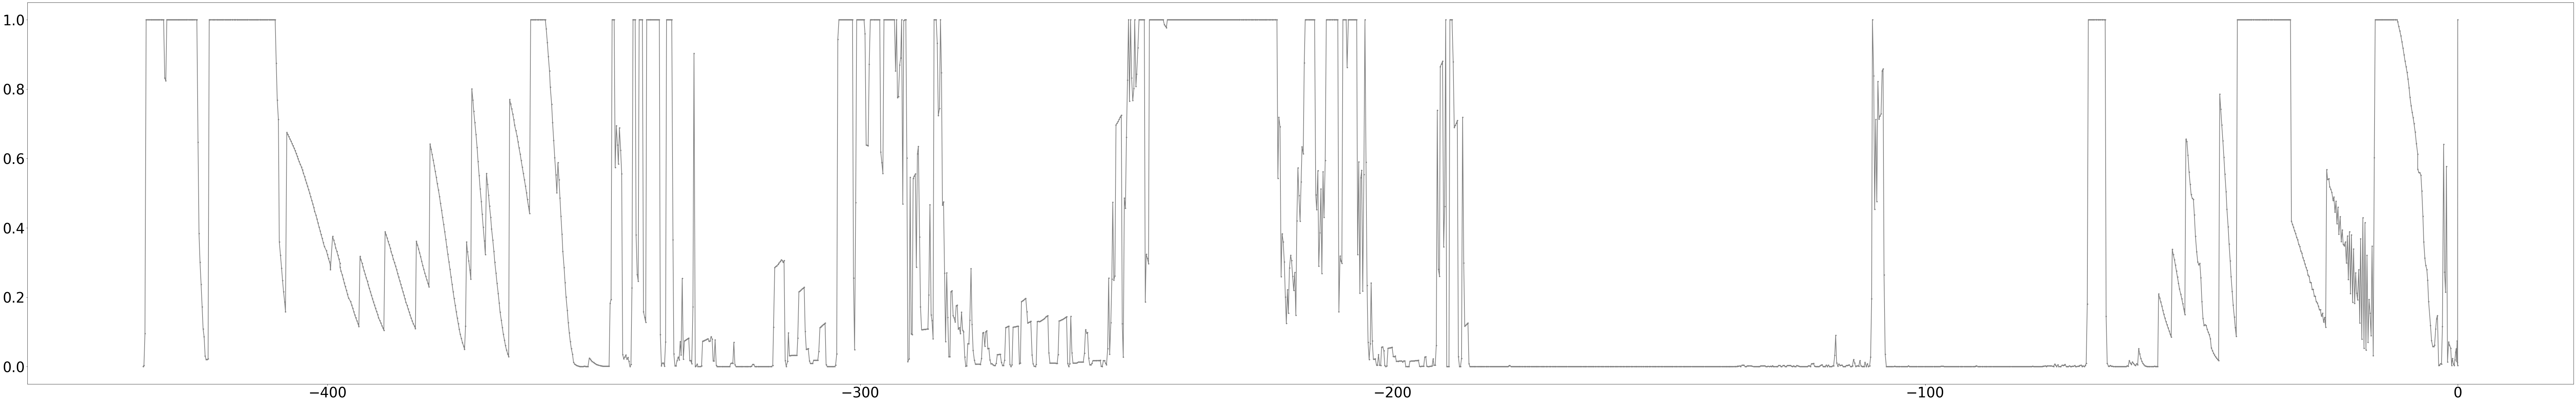

In [7]:
data_PHMI_fp=r'./data/04-10-2020_312LM_PHMI.fig'

def read_MatLabFig_type_A(matLabFig_fp,plot=True):
    from scipy.io import loadmat
    import matplotlib.pyplot as plt
    '''
    function - 读取MatLab的图表数据，类型-A
    
    Paras:
    matLabFig_fp - MatLab的图表数据文件路径
    
    return:
    fig_dic - 返回图表数据，（X,Y,Z）
    '''
    matlab_fig=loadmat(matLabFig_fp, squeeze_me=True, struct_as_record=False)
    fig_dic={} #提取MatLab的.fig值
    ax1=[c for c in matlab_fig['hgS_070000'].children if c.type == 'axes']
    if(len(ax1) > 0):
        ax1 = ax1[0]
    i=0
    for line in ax1.children:
        try:
            X=line.properties.XData #good   
            Y=line.properties.YData 
            Z=line.properties.ZData
            fig_dic[i]=(X,Y,Z)
        except:
            pass     
        i+=1
        
    if plot==True:
        fig=plt.figure(figsize=(130,20))
        markers=['.','+','o','','','']
        colors=['#7f7f7f','#d62728','#1f77b4','','','']
        linewidths=[2,10,10,0,0,0]
        
        plt.plot(fig_dic[1][1],fig_dic[1][2],marker=markers[0], color=colors[0],linewidth=linewidths[0])  
        
        plt.tick_params(axis='both',labelsize=40)
        plt.show()
    
    return fig_dic

PHMI_dic=read_MatLabFig_type_A(matLabFig_fp=data_PHMI_fp)

由跳变点分割曲线的基本思路是，计算卷积，获取反映跳变点变化的特征值-->由标准计分标准化卷积值，方便设置阈值-->返回满足阈值的索引值-->定义根据索引，分割列表的函数，根据满足阈值的索引值分割列表，包括分割卷积值、分割原始数据和分割索引值等-->返回分割结果，图表打印现实结果。

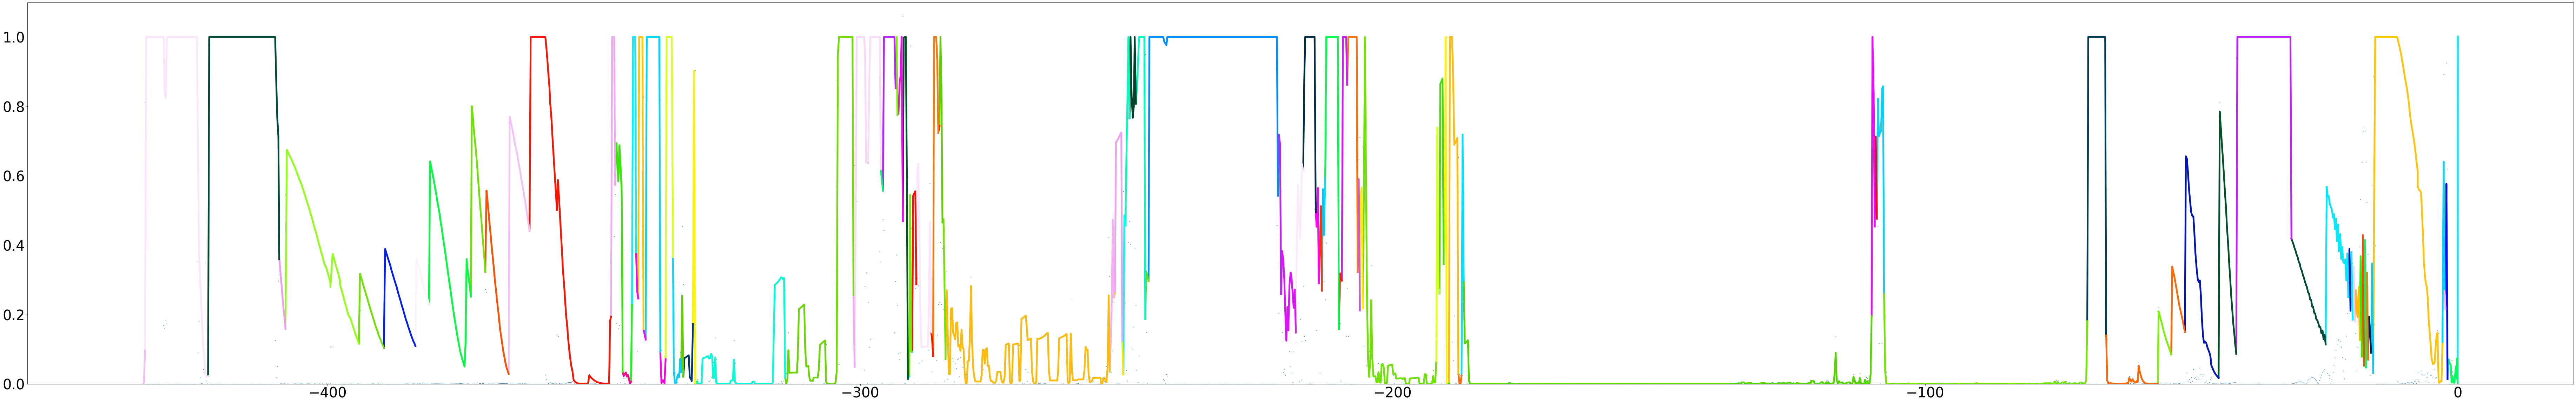

In [45]:
def curve_segmentation_1DConvolution(data,threshold=1):
    import numpy as np
    from scipy import stats
    '''
    function - 应用一维卷积，根据跳变点分割数据
    
    Paras:
    data - 待处理的一维度数据
    
    return:
    data_seg - 列表分割字典，"dataIdx_jump"-分割索引值，"data_jump"-分割原始数据，"conv_jump"-分割卷积结果
    '''
    def lst_index_split(lst, args):
        '''
        function - 根据索引，分割列表
        
        transfer:https://codereview.stackexchange.com/questions/47868/splitting-a-list-by-indexes/47877 
        '''
        if args:
            args=(0,) + tuple(data+1 for data in args) + (len(lst)+1,)
        seg_list=[]
        for start, end in zip(args, args[1:]):
            seg_list.append(lst[start:end])
        return seg_list
    
    data=data.tolist()
    kernel_conv=[-1,2,-1] #定义卷积核，即指示函数
    result_conv=np.convolve(data,kernel_conv,'same')
    #标准化，方便确定阈值，根据阈值切分列表
    z=np.abs(stats.zscore(result_conv)) #标准计分-绝对值
    z_=stats.zscore(result_conv) #标准计分
    
    threshold=threshold
    breakPts=np.where(z > threshold) #返回满足阈值的索引值
    breakPts_=np.where(z_ < -threshold)
    
    #根据满足阈值的索引值，切分列表
    conv_jump=lst_index_split(result_conv.tolist(), breakPts_[0].tolist()) #分割卷积结果
    data_jump=lst_index_split(data, breakPts_[0].tolist()) #分割原始数据
    dataIdx_jump=lst_index_split(list(range(len(data))), breakPts_[0].tolist()) #分割索引值
    data_seg={"dataIdx_jump":dataIdx_jump,"data_jump":data_jump,"conv_jump":conv_jump}
    
    return data_seg

p_X=PHMI_dic[1][1]
p_Y=PHMI_dic[1][2]    
p_Y_seg=curve_segmentation_1DConvolution(p_Y)

'''展平列表函数'''
flatten_lst=lambda lst: [m for n_lst in lst for m in flatten_lst(n_lst)] if type(lst) is list else [lst]

#打印分割结果
import matplotlib.pyplot as plt
plt.figure(figsize=(130, 20))
plt.scatter(p_X, [abs(v) for v in flatten_lst(p_Y_seg["conv_jump"])],s=1) 

def nestedlst_insert(nestedlst):
    '''
    function - 嵌套列表，子列表前后插值
    
    Paras:
    nestedlst - 嵌套列表
    
    return:
    nestedlst - 分割后的列表
    '''
    for idx in range(len(nestedlst)-1):
        nestedlst[idx+1].insert(0,nestedlst[idx][-1])
    nestedlst.insert(0,nestedlst[0])
    return nestedlst

def uniqueish_color():
    import matplotlib.pyplot as plt
    import numpy as np
    '''
    function - 使用matplotlib提供的方法随机返回浮点型RGB
    '''
    return plt.cm.gist_ncar(np.random.random())

data_jump=p_Y_seg["data_jump"]
data_jump=nestedlst_insert(data_jump)

dataIdx_jump=p_Y_seg['dataIdx_jump']
dataIdx_jump=nestedlst_insert(dataIdx_jump)

p_X_seg=[[p_X[idx] for idx in g] for g in dataIdx_jump]
for val,idx in zip(data_jump,p_X_seg):
    plt.plot(idx, val, color=uniqueish_color(),linewidth=5.0)

plt.ylim(0,1.1)
plt.tick_params(axis='both',labelsize=40)
plt.show()

#### 1.1.2 二维卷积与图像特征提取
一维卷积是卷积核滑动，对应位置求积后计算和。二维卷积同样，此时卷积核的维度为2，通常为奇数，在二维平面上滑动，同样对应位置上求积后计算和。所使用的方法为scipy库提供的`scipy.signal import convolve2d`，其中同样有'mode'参数（'full','valid','same'），并有边界处理参数（'fill','wrap','symm'）。在下述的测试代码中，调入了一个图像，该图像RGB值中，G和B值均为0，只是变化R值，并仅有红（255）和黑（0）两类值。通过给定卷积核，计算卷积，观察前后的数据变化，确认是卷积核滑动，对应位置乘积求和替换卷积核中心对应位置的图像值。

同样使用fashion_mnist数据集中的图像测试卷积，边缘检测卷积核也能够探测出图像变化的边界位置。

> fashion_mnist数据集是深度学习的基础数据集，可以替代已经被广泛，无数次重复使用似乎不再新鲜的MNIST手写数据集。具体查看深度学习部分章节内容。

Verify that the dimensions are the same: (12, 12) (3, 3)


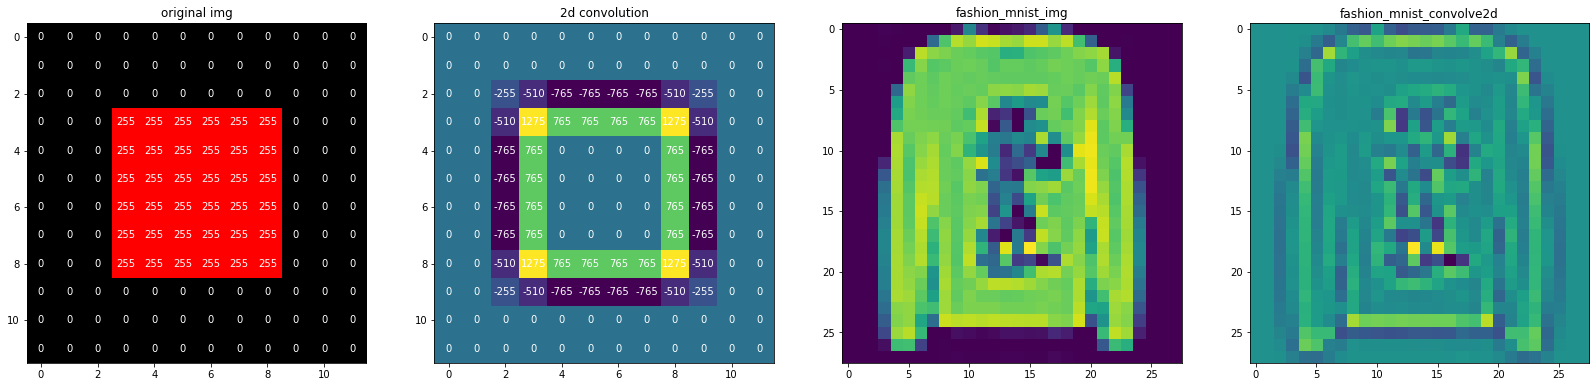

In [134]:
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
from skimage.morphology import square
from scipy.signal import convolve2d

img_12Pix_fp=r'./data/12mul12Pixel.bmp'
fig, axs=plt.subplots(1,4,figsize=(28,7))

#A - 子图1，原始图像，及RGB值中的R值
img_12Pix=io.imread(img_12Pix_fp)
struc_square=square(12)
axs[0].imshow(img_12Pix,cmap="Paired", vmin=0, vmax=12)
for i in range(struc_square.shape[0]):
    for j in range(struc_square.shape[1]):
        axs[0].text(j, i, img_12Pix[:,:,0][i,j], ha="center", va="center", color="w")
axs[0].set_title('original img')

#B -  子图2，二维卷积，卷积核可以探测边界
kernel_edge=np.array([[-1,-1,-1],
                      [-1,8,-1],
                      [-1,-1,-1]])  #边缘检测卷积核/滤波器。统一称为卷积核

img_12Pix_int32=img_12Pix[...,0].astype(np.int32) #有时图像默认值为'int8'，如果不修改数据类型，convolve计算结果会出错
print('Verify that the dimensions are the same:',img_12Pix_int32.shape,kernel_edge.shape) #仅计算R值
img_12Pix_convolve2d=convolve2d(img_12Pix_int32,kernel_edge,mode='same')
axs[1].imshow(img_12Pix_convolve2d)
for i in range(struc_square.shape[0]):
    for j in range(struc_square.shape[1]):
        axs[1].text(j, i, img_12Pix_convolve2d[i,j], ha="center", va="center", color="w")
axs[1].set_title('2d convolution')
   
#C- 使用 fashion_mnist数据集中的图像，实验卷积   
from tensorflow import keras   
fashion_mnist=keras.datasets.fashion_mnist    
(train_images, train_labels), (test_images, test_labels)=fashion_mnist.load_data() 
fashion_mnist_img=train_images[900] #随机提取一个图像
axs[2].imshow(fashion_mnist_img)
axs[2].set_title('fashion_mnist_img')

#D-  fashion_mnist数据集中随机一个图像的卷积
fashion_mnist_convolve2d=convolve2d(fashion_mnist_img,kernel_edge,mode='same')
axs[3].imshow(fashion_mnist_convolve2d)
axs[3].set_title('fashion_mnist_convolve2d')

plt.show()

图像处理中广泛使用二维卷积处理图像达到特殊的效果，或者提取图像的特征。下述列出[图像处理主要使用的卷积核](https://lodev.org/cgtutor/filtering.html):

1. 同一性（identity）：$\begin{bmatrix}0 & 0&0 \\0 & 1&0\\0 & 0&0 \end{bmatrix} $

2. 锐化（sharpen）：$\begin{bmatrix}0 & -1&0 \\-1 & 5&-1\\0 & -1&0 \end{bmatrix} $，$\begin{bmatrix}-1 & -1&-1 \\-1 & 9&-1\\-1 & -1&-1 \end{bmatrix} $，$\begin{bmatrix}1 & 1&1 \\1 & -7&1\\1 & 1&1 \end{bmatrix} $，$\begin{bmatrix}-k & -k&-k \\-k & 8k+1&-k\\-k & -k&-k \end{bmatrix} $，$\begin{bmatrix}-1&-1&-1&-1&-1 \\-1&2&2&2&-1 \\-1&2&8&2&-1 \\-1&2&2&2&-1 \\1&-1&-1&-1&-1  \end{bmatrix} $

3. 边缘检测（edge detection）：$\begin{bmatrix}-1 & -1&-1 \\-1 & 8&-1\\-1 & -1&-1 \end{bmatrix}$， $\begin{bmatrix}0 & 1&0 \\1 & -4&1\\0 & 1&0 \end{bmatrix}$， $\begin{bmatrix}0&0&0&0&0 \\0&0&0&0&0  \\-1&-1&2&0&0  \\0&0&0&0&0  \\0&0&0&0&0   \end{bmatrix}$， $\begin{bmatrix}0&0&-1&0&0 \\0&0&-1&0&0  \\0&0&4&0&0  \\0&0&-1&0&0  \\0&0&-1&0&0   \end{bmatrix}$， $\begin{bmatrix}-1&0&0&0&0 \\0&-2&0&0&0  \\0&0&6&0&0  \\0&0&0&-2&0  \\0&0&0&0&-1   \end{bmatrix}$

4. 浮雕（embossing filter）:$\begin{bmatrix}-1 & -1&0 \\-1 & 0&1\\0 & 1&1 \end{bmatrix}$ ，$\begin{bmatrix}-1&-1&-1&-1&0 \\-1&-1&-1&0&1 \\-1&-1&0&1&1  \\-1&0&1&1&1  \\0&1&1&1&1   \end{bmatrix}$

5. 模糊（blur）：均值模糊（box filter, averaging） $\begin{bmatrix}1 & 1&1 \\1 & 1&1\\1 & 1&1 \end{bmatrix} \times  \frac{1}{9} $， $\begin{bmatrix}0. & 0.2&0. \\0.2 & 0.&0.2\\0. & 0.2&0. \end{bmatrix} $， $\begin{bmatrix}0&0&1&0&0 \\0&1&1&1&0  \\1&1&1&1&1  \\0&1&1&1&0 \\0&0&1&0&0  \end{bmatrix}$；高斯模糊（gaussian blur,approximation）$\begin{bmatrix}1 & 2&1 \\2 & 4&2\\1 & 2&1 \end{bmatrix} \times  \frac{1}{16} $；运动模糊（motion blur）$\begin{bmatrix}1&0&0&0&0&0&0&0&0 \\0&1&0&0&0&0&0&0&0 \\0&0&1&0&0&0&0&0&0  \\0&0&0&1&0&0&0&0&0 \\0&0&0&0&1&0&0&0&0\\0&0&0&0&0&1&0&0&0\\0&0&0&0&0&0&1&0&0\\0&0&0&0&0&0&0&1&0\\0&0&0&0&0&0&0&0&1\end{bmatrix}$

### 1.2 SIR传播模型
开始数学模型的建立，先确定自变量(independent variables)和因变量(dependent variables)。自变量为时间$t$，以天为单位。考虑两组相关的因变量。

第一组因变量计算每一组（归类）中的人数，均为时间的函数。$\begin{cases}S=S(t) &易感（susceptible）人数 \\I=I(t) & 受感（infected）人数\\R=R(t) & 恢复（recovered）人数\end{cases} $。第二组因变量表示这三种类型中每一种占总人口数的比例，假设$N$为总人口数，$\begin{cases}s(t)=S(t)/N &易感（susceptible）人群比例 \\i(t)=I(t)/N & 感染（infected）人群比例\\r(t)=R(t)/N & 恢复（recovered）人群比例\end{cases} $，因此$s(t)+i(t)+r(t)=1$。使用总体计数可能看起来更自然，但是如果使用分数替代，则会是计算更简单。这两组因变量是成比例的，所以任何一组都能给我们病毒传播的相同信息。

* 因为忽略了出生率和移民等改变总体人口数据的因素，“易感人群”中的个体被感染，则会进入“受感人群”，而“受感人群”中的个体恢复（或死亡）则进入“恢复人群”。假设$S(t)$的时间变化率，“易感人群”的人口数量取决于已经感染的人数，以及易感染者和被感染者接触的数量。特别是，假设每个被感染的人每天有固定数量（$b$）的接触者，这足以传播疾病。同时，并不是所有的接触者都是“易感人群”，如果假设人群是均匀混合的，接触者中易感染者的比例是$s(t)$，那么，平均而言，每个感染者每天产生$bs(t)$个新的被感染者。（由于“易感人群”众多，而“受感人群”相对较少，可以忽略一些较为棘手的计算情况，例如一个易感个体同一天遭遇多个受感个体）。

* 同时假设在任何给定的一天内，受感人群有固定比例（k）的人恢复（或死亡），进入“恢复人群”。

**易感人群微分方程**,根据上述假设，可以得到，$\frac{dS}{dt}=-bs(t)I(t) $，为了方便理解可以假设总人口数$N=10$，当前时刻$t$下，易感人数$S=4$(则，$s=4/10$)，受感人数$I=3$（则，$i=3/10$），恢复人数$R=3$(则，$r=3/10$)，在变化时间$\triangle t$下，因为参数$b$为“受感人群”中每个人的固定数量接触者,假设$b=2$，那么对于整个“受感人群”的接触者为$bI(t)=2 \times 3=6$,而因为并不是所有接触者都是“易感人群”，假设了人群为均匀混合，则接触者中易感染者的比例即是$s(t)=4/10$，因此$\triangle S=bI(t)s(t)=2 \times 3 \times 4/10=2.4$，因为“易感人群”中的个体接触了“受感人群”中的个体而转换为“受感人群”中新的个体，“易感人群”中个体的数量是减少的，因此要加上符号。最终当变化时间$\triangle t$后（未考虑I到R的转换），$S=1.6，I=5.4，R=3$。依据上述微分方程，根据总体计数和分数（或百分比）替代是成比例的，因此最终得到易感人群$\triangle t$变化下单位微分方程为：$\frac{ds}{dt}=-bs(t)i(t)$。

**恢复人群微分方程**，根据上述假设，可以得到，$\frac{dr}{dt}=ki(t) $，其中$k$是“受感人群”到“恢复人群的转换比例”，同样应用上述假设，如果$k=0.2$，则$\triangle R=0.2*3=0.6$，最终，$S=1.6，I=4.8,R=3.6$。

**受感人群微分方程**，因为$s(t)+i(t)+r(t)=1$，可以得到$\frac{ds}{dt} + \frac{di}{dt} + \frac{dr}{dt} $，因此$\frac{di}{dt} =bs(t)i(t)-ki(t)$。

最终的SIR传播模型为：$\begin{cases}\frac{ds}{dt}=-bs(t)i(t) \\\frac{di}{dt} =bs(t)i(t)-ki(t)\\\frac{dr}{dt}=ki(t) \end{cases} $


> 对于SIR模型的解释参考来自于[MAA](https://www.maa.org/)(Mathematical Association of America)，[The SIR Model for Spread of Disease - The Differential Equation Model](https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-the-differential-equation-model)<作者：David Smith and Lang Moore>; 代码参考[The SIR epidemic model](https://scipython.com/book/chapter-8-scipy/additional-examples/the-sir-epidemic-model/)

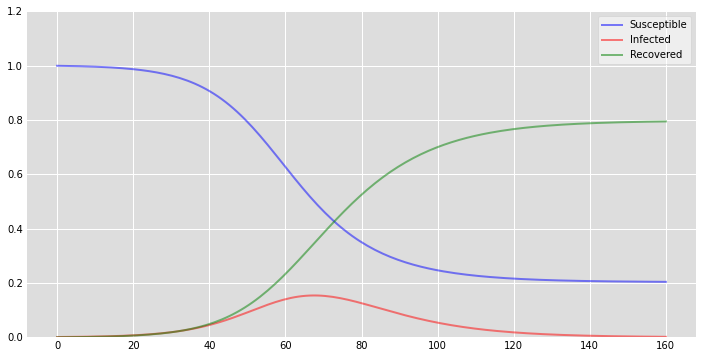

In [13]:
import numpy as np
#参数配置
N=1000 #总人口数
I_0,R_0=1,0 #初始化受感人群，及恢复人群的人口数
S_0=N-I_0-R_0 #有受感人群和恢复人群，计算得易感人群人口数
beta,gamma=0.2,1./10 #配置参数b(即beta)和k(即gamma)
t=np.linspace(0,160,160) #配置时间序列

#定义SIR模型微分方程函数
def SIR_deriv(y,t,N,beta,gamma,plot=False):   
    import numpy as np
    from scipy.integrate import odeint
    import matplotlib.pyplot as plt
    '''
    function - 定义SIR传播模型微分方程
    
    Paras:
    y - S,I,R初始化值（例如，人口数）
    t - 时间序列
    N - 总人口数
    beta - 易感人群到受感人群转化比例
    gamma - 受感人群到恢复人群转换比例
    
    return:
    SIR_array - S, I, R数量
    '''
    def deriv(y,t,N,beta,gamma):
        S,I,R=y
        dSdt=-beta*S*I/N
        dIdt=beta*S*I/N-gamma*I
        dRdt=gamma*I
        return dSdt,dIdt,dRdt
    
    deriv_integration=odeint(deriv,y,t,args=(N,beta,gamma))
    S,I,R=deriv_integration.T
    SIR_array=np.stack([S,I,R])
    #print(SIR_array)
    
    if plot==True:
        fig=plt.figure(facecolor='w',figsize=(12,6))
        ax=fig.add_subplot(111,facecolor='#dddddd',axisbelow=True)
        ax.plot(t,S/N,'b',alpha=0.5,lw=2,label='Susceptible')
        ax.plot(t,I/N,'r',alpha=0.5,lw=2,label='Infected')
        ax.plot(t,R/N,'g',alpha=0.5,lw=2,label='Recovered')
        
        ax.set_label('Time/days')
        ax.set_ylim(0,1.2)
        ax.yaxis.set_tick_params(length=0)
        ax.xaxis.set_tick_params(length=0)
        ax.grid(b=True, which='major', c='w', lw=1, ls='-')
        legend = ax.legend()
        legend.get_frame().set_alpha(0.5)
        for spine in ('top', 'right', 'bottom', 'left'):
            ax.spines[spine].set_visible(False)    
        plt.show()   
    
    return SIR_array
    

y_0=S_0,I_0,R_0
SIR_array=SIR_deriv(y_0,t,N,beta,gamma,plot=True)     

### 1.3 卷积扩散，成本栅格与物种散步
#### 1.3.1 卷积扩散
如果配置卷积核为$\begin{bmatrix}0.5 & 1&0.5 \\1 & -6&1\\0.5 & 1&0.5 \end{bmatrix} $，假设存在一个传播（传染）源，如下述程序配置一个栅格（.bmp图像），其值除了源为1（R值）外，其它的单元均为0。每次卷积，值都会以源为中心，向四周扩散，并且四角的值（绝对值）最小，水平垂直向边缘值（绝对值）稍大，越向内部值（绝对值）越大，形成了一个逐步扩散的趋势，并且具有强弱，即越趋向于传播源，其绝对值越大。同时，达到一定阶段后，扩散开始逐步消失，恢复为所有单元值为0的阶段。观察卷积扩散可以通过打印每次卷积后的值查看，也可以记录每次的结果最终存储为.gif文件，动态的观察图像的变化。

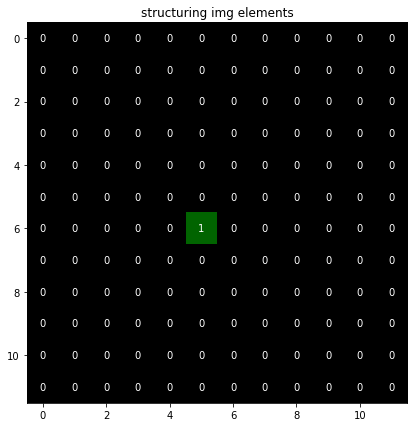

In [46]:
def img_struc_show(img_fp,val='R',figsize=(7,7)):
    from skimage import io
    from skimage.morphology import square,rectangle
    import matplotlib.pyplot as plt
    '''
    function - 显示图像以及颜色R值，或G,B值
    
    Paras:
    img_fp - 输入图像文件路径
    val - 选择显示值，R，G，或B
    figsize - 配置图像显示大小
    '''
    img=io.imread(img_fp)
    shape=img.shape
    struc_square=rectangle(shape[0],shape[1])
    fig, ax=plt.subplots(figsize=figsize)
    ax.imshow(img,cmap="Paired", vmin=0, vmax=12)                     
    for i in range(struc_square.shape[0]):
        for j in range(struc_square.shape[1]):
            if val=='R':
                ax.text(j, i, img[:,:,0][i,j], ha="center", va="center", color="w")
            elif val=='G':
                ax.text(j, i, img[:,:,1][i,j], ha="center", va="center", color="w")                         
            elif val=='B':
                ax.text(j, i, img[:,:,2][i,j], ha="center", va="center", color="w")                         
    ax.set_title('structuring img elements')
    plt.show

img_12Pix_1red_fp=r'./data/12mul12Pixel_1red.bmp'
img_struc_show(img_fp=img_12Pix_1red_fp,val='R')

扩散是一个随时间变化的动态过程，为了记录每一次扩散的结果，形成动态的变化显示，使用moviepy记录每次图像变化的结果，并存储为.gif文件，方便查看。卷积扩散主要是更新SIR变量值，其初始值配置为图像的R颜色值，除了源配置为1外，其它单元的值（R）均为0，这样可以比较清晰的观察卷积扩散的过程。卷积的计算使用scipy库提供的convolve方法。

In [45]:
class convolution_diffusion_img:
    '''
    class - 定义基于SIR模型的二维卷积扩散
    
    Paras:
    img_path - 图像文件路径
    save_path - 保持的.gif文件路径
    hours_per_second - 扩散时间长度
    dt - 时间记录值，开始值
    fps - 配置moviepy，write_gif写入GIF每秒帧数
    '''
    def __init__(self,img_path,save_path,hours_per_second,dt,fps):
        from skimage import io
        import numpy as np   
        self.save_path=save_path
        self.hours_per_second=hours_per_second
        self.dt=dt
        self.fps=fps        
        img=io.imread(img_path)
        SIR=np.zeros((1,img.shape[0], img.shape[1]),dtype=np.int32) #在配置SIR数组时，为三维度，是为了对接后续物种散步程序对SIR的配置
        SIR[0]=img.T[0] #将图像的RGB中R通道值赋值给SIR
        self.world={'SIR':SIR,'t':0} 
        
        self.dispersion_kernel=np.array([[0.5, 1 , 0.5],
                                        [1  , -6, 1],
                                        [0.5, 1, 0.5]]) #SIR模型卷积核 
        

    '''返回每一步卷积的数据到VideoClip中'''
    def make_frame(self,t):
        while self.world['t']<self.hours_per_second*t:
            self.update(self.world) 
        if self.world['t']<6:
            print(self.world['SIR'][0])
        return self.world['SIR'][0]

    '''更新数组，即基于前一步卷积结果的每一步卷积'''
    def update(self,world):        
        disperse=self.dispersion(world['SIR'], self.dispersion_kernel)
        world['SIR']=disperse 
        world['t']+=dt  #记录时间，用于循环终止条件

    '''卷积扩散'''
    def dispersion(self,SIR,dispersion_kernel):
        import numpy as np
        from scipy.ndimage.filters import convolve
        return np.array([convolve(SIR[0],self.dispersion_kernel,mode='constant',cval=0.0)]) #注意卷积核与待卷积数组的维度
    
    '''执行程序'''
    def execute_(self):        
        import moviepy.editor as mpy
        self.animation=mpy.VideoClip(self.make_frame,duration=1) #duration=1
        self.animation.write_gif(self.save_path,self.fps)    
        

img_12Pix_fp=r'./data/12mul12Pixel_1red.bmp' #图像文件路径
SIRSave_fp=r'./data/12mul12Pixel_1red_SIR.gif'
hours_per_second=20
dt=1 #时间记录值，开始值
fps=15 # 配置moviepy，write_gif写入GIF每秒帧数
convDiff_img=convolution_diffusion_img(img_path=img_12Pix_fp,save_path=SIRSave_fp,hours_per_second=hours_per_second,dt=dt,fps=fps)
convDiff_img.execute_()

[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
MoviePy - Building file ./data/12mul12Pixel_1red_SIR.gif with imageio.
[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]
[[  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0  -1 -11  -1   0   0   0   0]
 [  0   0   0   0   1 -1

为了方便查看动态变化的.gif文件，定义`animated_gif_show`函数。对图像的读取和处理使用了[Pillow库](https://pillow.readthedocs.io/en/stable/)。

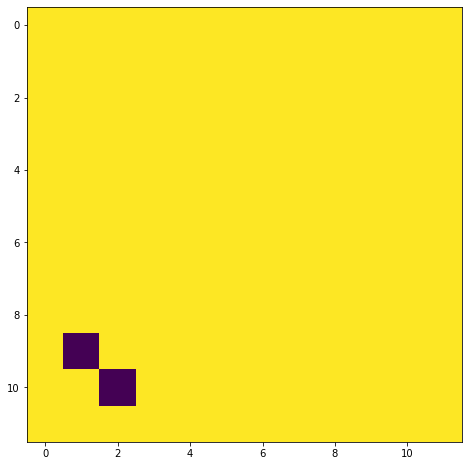

In [8]:
def animated_gif_show(gif_fp,figsize=(8,8)):
    from PIL import Image, ImageSequence
    import numpy as np
    import matplotlib.pyplot as plt
    import matplotlib.animation as animation
    from IPython.display import HTML
    '''
    function - 读入.gif，并动态显示
    
    Paras:
    gif_fp - GIF文件路径
    figsize - 图表大小
    '''
    gif=Image.open(gif_fp,'r')
    frames=[np.array(frame.getdata(),dtype=np.uint8).reshape(gif.size[0],gif.size[1]) for frame in ImageSequence.Iterator(gif)]

    fig=plt.figure(figsize=figsize)
    imgs=[(plt.imshow(img,animated=True),) for img in frames]

    anim=animation.ArtistAnimation(fig, imgs, interval=300,repeat_delay=3000, blit=True)  
    return HTML(anim.to_html5_video())
    
gif_fp=r'./data/12mul12Pixel_1red_SIR.gif'
animated_gif_show(gif_fp,figsize=(8,8))

#### 1.3.2 成本栅格与物种散布，SIR的空间传播模型
SIR传播模型是给定了总体人口数N，以及S,I,R的初始值，和$\beta , \gamma$转换系数，计算S,I,R人口数量的变化。SIR传播模型不具有空间属性，因此引入了卷积扩散，可以实现一个源向四周扩散的变化过程，并且始终以源的空间位置强度最大，并向四周逐步减弱。这样通过结合SIR模型和卷积扩散，可以实现SIR的空间传播模型。

可以这样理解SIR空间传播模型的过程，对于空间分布（即栅格，每个栅格单元有一个值或多个值，即存在多层栅格）配置有三个对应的栅格层（'SIR'），分别对应S，I和R值的空间分布，例如对于S而言，其初始值对应了用地类型对于物种散步的影响，即成本栅格或者是空间阻力值，如物种容易在林地、农田中迁移散步，而建筑和道路则会阻挡其散步，通过配置不同大小的值可以反映物种能够散步的强度（注意，有时可以用大的值表示阻力值小，而小的值表示阻力值大，具体需要根据算法的方式确定，或调整为符合习惯的数值大小表达）；对于对应的I层栅格而言，初始值需要设定源，可以为一个或者多个，多个源可以是分散的，也可以是聚集为片区的，源也可以根据源自身的强度配置代表不同强度的值，但是除了源之外的所有值均为0；对于对应的R层，因为在开始时间点，并没有恢复者（或死亡）案例，因此所有值设置为0。

配置好SIR空间分布的栅格层后，计算可以理解为纵向的SIR模型传播，以及水平向的卷积扩散过程的结合。在纵向上，每一个空间点（即一个位置的单元栅格，每个位置有S，I和R３个层的栅格）都有一定数量的人口数（即空间阻力值），每一个位置对应的S，I和R单元栅格的SIR传播模型计算过程与上述解释的SIR模型传播过程是相同的，只是在一开始的时候，只有I层对应源的位置有非0值，因此源的栅格位置是有纵向（S-->I-->R）的传播，但是为0的位置，SIR模型计算公式变化结果为0，即没有纵向上的传播；除了纵向SIR传播，各层的水平向发生着卷积扩散，对于S ,I和R三个栅格层，水平向的扩散速度是不同的，通过变量'dispersion_rates'扩散系数确定强度，三个值分别对应S，I和R的3个栅格层。因为I层是给了值非0的源，因此会发生水平扩散，新扩散的区域在SIR模型计算时，纵向上就会发生传播变化。而在配置扩散系数时，对应的S层的扩散系数为0，即S栅格层水平向上并不会发生卷积扩散，卷积扩散仅发生在I和R层，这与S层为“易感人群”但并传播，而I层“受感人群”和R层“恢复人群或死亡”是病毒携带者是可以传染扩散的过程相一致。每一时间步，由纵向SIR传播和水平向卷积扩散共同作用，因此每一时刻的SIR空间栅格值变化为`world['SIR'] += dt*(deriv_infect+disperse)`，其中'deriv_infect'为纵向SIR的传播结果，'disperse'为水平向的扩散结果，通过求和作为二者共同作用的结果。同时，乘以'dt'时间参数，开始时，时间参数比较小，而随时间的流逝，时间参数的值越来越大，那么各层的绝对值大小也会增加的更快，即传播强度会增加。

同样应用moviepy库记录每一时刻的变化。

* 确定源的位置

首先读取分类数据，因为不同分类数据的标识各异，通常无法正常显示为颜色方便地物的辨别，因此建立'las_classi_colorName'分类值到颜色的映射字典，将其转换为不同颜色的表达，从而根据颜色辨别地物，并方便观察位置信息。位置信息的获取是使用skimage库提供的ImageViewer方法。

分类数据为点云数据处理部分的分类数据，因为SIR的空间传播模型计算中，卷积扩散计算过程比较耗时，因此需要压缩数据量，并确保分类值正确。压缩数据时，skimage.transform提供了rescale,resize，和downscale_local_mean等方法，但是没有提供给定一个区域（block），返回区域内频数最大的值的方式；skimage.measure中的block_reduce方法，仅有numpy.sum, numpy.min, numpy.max, numpy.mean 和 numpy.median返回值，因此自定义函数`downsampling_blockFreqency`，实现给定二维数组，和区域大小，以区域内出现次数最多的值为该区域的返回值，实现降采样。

In [1]:
def downsampling_blockFreqency(array_2d,blocksize=[10,10]):
    import numpy as np
    from statistics import multimode
    from tqdm import tqdm
    #flatten_lst=lambda lst: [m for n_lst in lst for m in flatten_lst(n_lst)] if type(lst) is list else [lst] #展平列表函数
    '''
    fuction - 降采样二维数组，根据每一block内值得频数最大值，即最多出现得值为每一block的采样值
    
    Paras:
    array_2d - 待降采样的二维数组
    blocksize - block大小，即每一采用的范围
    '''
    
    shape=array_2d.shape
    row,col=blocksize
    row_p,row_overlap=divmod(shape[1],row)  #divmod(a,b)方法为除法取整，以及a对b的余数
    col_p,col_overlap=divmod(shape[0],col)
    print("row_num:",row_p,"col_num:",col_p)
    array_extraction=array_2d[:col_p*col,:row_p*row]  #移除多余部分，规范数组，使其正好切分均匀
    print("array extraction shape:",array_extraction.shape,"original array shape:",array_2d.shape)  
    
    h_splitArray=np.hsplit(array_extraction,row_p)
    
    v_splitArray=[np.vsplit(subArray,col_p) for subArray in h_splitArray]
    #mostFrequency=[[multimode(b.flatten())[0] for b in v] for v in v_splitArray]
    blockFrenq_list=[]
    for h in tqdm(v_splitArray):
        temp=[]
        for b in h:
            blockFrenq=multimode(b.flatten())[0]
            temp.append(blockFrenq)
        blockFrenq_list.append(temp)   
    downsample=np.array(blockFrenq_list).swapaxes(0,1)
    return downsample  

import sys
import skimage.io
import skimage.viewer
from skimage.transform import rescale
import pandas as pd
from matplotlib import colors
import numpy as np
from skimage.measure import block_reduce

classi_fp=r'F:\GitHubBigData\IIT_lidarPtClouds\mosaic\classification_mosaic.tif'
mosaic_classi_array = skimage.io.imread(classi_fp)
mosaic_classi_array_rescaled=downsampling_blockFreqency(mosaic_classi_array, blocksize=(20,20))

las_classi_colorName={0:'black',1:'white',2:'beige',3:'palegreen',4:'lime',5:'green',6:'tomato',7:'silver',8:'grey',9:'lightskyblue',10:'purple',11:'slategray',12:'grey',13:'cadetblue',14:'lightsteelblue',15:'brown',16:'indianred',17:'darkkhaki',18:'azure',9999:'white'}
las_classi_colorRGB=pd.DataFrame({key:colors.hex2color(colors.cnames[las_classi_colorName[key]]) for key in las_classi_colorName.keys()})
classi_array_color=[pd.DataFrame(mosaic_classi_array_rescaled).replace(las_classi_colorRGB.iloc[idx]).to_numpy() for idx in las_classi_colorRGB.index]
classi_img=np.stack(classi_array_color).swapaxes(0,2).swapaxes(0,1)
print("finished img preprocessing...")

C:\Users\richi\anaconda3\envs\rasterio\lib\site-packages\skimage\viewer\utils\__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


row_num: 1250 col_num: 1125
array extraction shape: (22500, 25000) original array shape: (22501, 25001)


100%|██████████| 1250/1250 [01:31<00:00, 13.74it/s]


finished img preprocessing...


In [51]:
viewer=skimage.viewer.ImageViewer(classi_img)
viewer.show()

[]

<img src="./imgs/13_01.png" height="auto" width="auto" title="caDesign">

* 定义SIR的空间传播模型类

In [2]:
class SIR_spatialPropagating:
    '''
    funciton - SIR的空间传播模型
    
    Paras:
    classi_array - 分类数据（.tif，或者其它图像类型），或者其它可用于成本计算的数据类型
    cost_mapping - 分类数据对应的成本值映射字典
    beta - beta值，确定S-->I的转换率
    gamma - gamma值，确定I-->R的转换率
    dispersion_rates - SIR三层栅格各自对应的卷积扩散率
    dt - 时间更新速度
    hours_per_second - 扩散时间长度/终止值(条件)
    duration - moviepy参数配置，持续时长
    fps - moviepy参数配置，每秒帧数
    SIR_gif_savePath - SIR空间传播计算结果.gif文件保存路径
    '''
    def __init__(self,classi_array,cost_mapping,start_pt=[10,10],beta=0.3,gamma=0.1,dispersion_rates=[0, 0.07, 0.03],dt=1.0,hours_per_second=7*24,duration=12,fps=15,SIR_gif_savePath=r'./SIR_sp.gif'):
        from sklearn.preprocessing import MinMaxScaler
                
        #将分类栅格，按照成本映射字典，转换为成本栅格(配置空间阻力)
        for idx,(identity,cost_value) in enumerate(cost_mapping.items()):
            classi_array[classi_array==cost_value[0]]=cost_value[1]
        self.mms=MinMaxScaler()
        normalize_costArray=self.mms.fit_transform(classi_array) #标准化成本栅格

        #配置SIR模型初始值，将S设置为空间阻力值
        SIR=np.zeros((3,normalize_costArray.shape[0], normalize_costArray.shape[1]),dtype=float)        
        SIR[0]=normalize_costArray
        
        #配置SIR模型中I的初始值。1，可以从设置的1个或多个点开始；2，可以将森林部分直接设置为I有值，而其它部分保持0。
        #start_pt=int(0.7*normalize_costArray.shape[0]), int(0.2*normalize_costArray.shape[1])  #根据行列拾取点位置
        #print("起始点:",start_pt)
        start_pt=start_pt
        SIR[1,start_pt[0],start_pt[1]]=0.8  #配置起始点位置值

        #配置转换系数，以及卷积核
        self.beta=beta #β值
        self.gamma=gamma #γ值
        self.dispersion_rates=dispersion_rates  #扩散系数
        dispersion_kernelA=np.array([[0.5, 1 , 0.5],
                                     [1  , -6, 1],
                                     [0.5, 1, 0.5]])  #卷积核_类型A    
        dispersion_kernelB=np.array([[0, 1 , 0],
                                     [1 ,1, 1],
                                     [0, 1, 0]])  #卷积核_类型B  

        self.dispersion_kernel=dispersion_kernelA #卷积核
        self.dt=dt  #时间记录值，开始值
        self.hours_per_second=hours_per_second  #终止值(条件) 
        self.world={'SIR':SIR,'t':0} #建立字典，方便数据更新
        
        #moviepy配置
        self.duration=duration
        self.fps=fps        
                 
        #保存路径
        self.SIR_gif_savePath=SIR_gif_savePath

    '''SIR模型'''
    def deriv(self,SIR,beta,gamma):
        S,I,R=SIR
        dSdt=-1*beta*I*S  
        dRdt=gamma*I
        dIdt=beta*I*S-gamma*I
        return np.array([dSdt, dIdt, dRdt])

    '''卷积扩散'''
    def dispersion(self,SIR,dispersion_kernel,dispersion_rates):
        from scipy.ndimage.filters import convolve
        return np.array([convolve(e,dispersion_kernel,cval=0)*r for (e,r) in zip(SIR,dispersion_rates)])

    '''执行SIR模型和卷积，更新world字典'''
    def update(self,world):
        deriv_infect=self.deriv(world['SIR'],self.beta,self.gamma)
        disperse=self.dispersion(world['SIR'], self.dispersion_kernel, self.dispersion_rates)
        world['SIR'] += self.dt*(deriv_infect+disperse)    
        world['t'] += self.dt

    '''将模拟计算的值转换到[0,255]RGB色域空间'''
    def world_to_npimage(self,world):
        coefs=np.array([2,20,25]).reshape((3,1,1))
        SIR_coefs=coefs*world['SIR']
        accentuated_world=255*SIR_coefs
        image=accentuated_world[::-1].swapaxes(0,2).swapaxes(0,1) #调整数组格式为用于图片显示的（x,y,3）形式
        return np.minimum(255, image)

    '''返回每一步的SIR和卷积综合蔓延结果'''
    def make_frame(self,t):
        while self.world['t']<self.hours_per_second*t:
            self.update(self.world)     
        return self.world_to_npimage(self.world)    

    '''执行程序'''
    def execute(self):
        import moviepy.editor as mpy
        animation=mpy.VideoClip(self.make_frame,duration=self.duration)  #12
        animation.write_gif(self.SIR_gif_savePath, fps=self.fps) #15

空间阻力值的配置，需要根据具体的研究对象做出调整。也可以增加新的多个条件，通过栅格计算后作为输入的一个条件栅格。`cost_mapping`成本映射字典，键为文字标识，值为一个元组，第一个值为分类值，第二个值为空间阻力值。

In [3]:
#成本栅格（数组）
classi_array=mosaic_classi_array_rescaled    

#配置用地类型的成本值（空间阻力值）
cost_H=250
cost_M=125
cost_L=50
cost_Z=0
cost_mapping={
            'never classified':(0,cost_Z),
            'unassigned':(1,cost_Z),
            'ground':(2,cost_M),
            'low vegetation':(3,cost_H),
            'medium vegetation':(4,cost_H),
            'high vegetation':(5,cost_H),
            'building':(6,cost_Z),
            'low point':(7,cost_Z),
            'reserved':(8,cost_M),
            'water':(9,cost_M),
            'rail':(10,cost_L),
            'road surface':(11,cost_L),
            'reserved':(12,cost_M),
            'wire-guard(shield)':(13,cost_M),
            'wire-conductor(phase)':(14,cost_M),
            'transimission':(15,cost_M),
            'wire-structure connector(insulator)':(16,cost_M),
            'bridge deck':(17,cost_L),
            'high noise':(18,cost_Z),
            'null':(9999,cost_Z)       
            }    

import util
s_t=util.start_time()
#参数配置
start_pt=[418,640]  #[3724,3415]
beta=0.3
gamma=0.1
dispersion_rates=[0, 0.07, 0.03]  #S层卷积扩散为0，I层卷积扩散为0.07，R层卷积扩散为0.03
dt=1.0
hours_per_second=30*24 #7*24
duration=12 #12
fps=15 #15
SIR_gif_savePath=r'E:\dataset\results\SIR_sp.gif'

SIR_sp=SIR_spatialPropagating(classi_array=classi_array,cost_mapping=cost_mapping,start_pt=start_pt,beta=beta,gamma=gamma,dispersion_rates=dispersion_rates,dt=dt,hours_per_second=hours_per_second,duration=duration,fps=fps,SIR_gif_savePath=SIR_gif_savePath)
SIR_sp.execute()
util.duration(s_t)

start time: 2020-09-05 23:00:45.507837


t:   0%|          | 0/180 [00:00<?, ?it/s, now=None]

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
MoviePy - Building file E:\dataset\results\SIR_sp.gif with imageio.


end time: 2020-09-05 23:23:27.824231
Total time spend:22.70 minutes


![](./data/SIR_sp_compress.gif)

### 1.4 要点
#### 1.4.1 数据处理计数

* 使用sympy库的Piecewise方法建立分段函数

* 使用matplotlib库的animation方法实习动态图表

* 使用scipy库提供的odeint方法，组合多个常微分方程

#### 1.4.2 新建立的函数

* class - 一维卷积动画解析，可以自定义系统函数和信号函数，`class dim1_convolution_SubplotAnimation(animation.TimedAnimation)`

* function - 定义系统响应函数.类型-1， `G_T_type_1()`

* function - 定义输入信号函数，类型-1， `F_T_type_1(timing)`

* function - 定义系统响应函数.类型-2，`G_T_type_2()`

* function - 定义输入信号函数，类型-2， `F_T_type_2(timing)`

* function - 读取MatLab的图表数据，类型-A， `read_MatLabFig_type_A(matLabFig_fp,plot=True)`

* function - 应用一维卷积，根据跳变点分割数据， `curve_segmentation_1DConvolution(data,threshold=1)`

* function - 根据索引，分割列表，`lst_index_split(lst, args)`

* function - 展平列表函数， `flatten_lst=lambda lst: [m for n_lst in lst for m in flatten_lst(n_lst)] if type(lst) is list else [lst]`

* function - 嵌套列表，子列表前后插值，`nestedlst_insert(nestedlst)`

* function - 使用matplotlib提供的方法随机返回浮点型RGB， `uniqueish_color()`

* function - 定义SIR传播模型微分方程， `SIR_deriv(y,t,N,beta,gamma,plot=False)`

* function - 显示图像以及颜色R值，或G,B值，`img_struc_show(img_fp,val='R',figsize=(7,7))`

* class - 定义基于SIR模型的二维卷积扩散，`class convolution_diffusion_img`

* function - 读入.gif，并动态显示，`animated_gif_show(gif_fp,figsize=(8,8))`

* fuction - 降采样二维数组，根据每一block内值得频数最大值，即最多出现得值为每一block的采样值，`downsampling_blockFreqency(array_2d,blocksize=[10,10])`

* class - SIR的空间传播模型， `SIR_spatialPropagating`

#### 1.4.3 所调用的库

In [1]:
import numpy as np
import pandas as pd
import sys
import math

import sympy
from sympy import pprint,Piecewise

from IPython.display import HTML
import numpy as np

from scipy import signal
from scipy.io import loadmat
from scipy import stats
from scipy.signal import convolve2d
from scipy.integrate import odeint
from scipy.ndimage.filters import convolve

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.pyplot as plt

from skimage import io
from skimage.morphology import square,rectangle
import skimage.io
import skimage.viewer
from skimage.transform import rescale
from skimage.measure import block_reduce

from tensorflow import keras  
import moviepy.editor as mpy
from statistics import multimode
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler

C:\Users\richi\anaconda3\envs\rasterio\lib\site-packages\skimage\viewer\utils\__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *


ModuleNotFoundError: No module named 'tensorflow'

#### 1.4.4 参考文献
1. Robert E.Ricklefs著. 孙儒泳等译.生态学/The economy of nature[M].高度教育出版社.北京.2004.7 第5版. ------非常值得推荐的读物(教材)，图文并茂